Step 1:Importing Resources

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Step 2: Generating Evaluation Data

In [6]:
def evaluate_model(model_path, X_test, y_test, output_csv="C://Users//DELL//Desktop//Projects//Predictive Analytics for Sales Forecasting//sales_forecasting//models//model_evaluation.csv"):
    """Evaluates the trained model and saves results."""
    # Load the model
    model = joblib.load(model_path)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Compute metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results = pd.DataFrame({
        'Metric': ['MAE', 'RMSE', 'R²'],
        'Value': [mae, rmse, r2]
    })
    results.to_csv(output_csv, index=False)
    
    print("Model evaluation completed. Results saved to", output_csv)
    print(results.head())
    return results

Step 3: Generate sample data for model_evaluation.csv

In [10]:
# Generate sample data for model_evaluation.csv
sample_results = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Value': [2.35, 3.78, 0.85]  # Example values
})
sample_results.to_csv("C://Users//DELL//Desktop//Projects//Predictive Analytics for Sales Forecasting//sales_forecasting//models//model_evaluation.csv", index=False)

print("Sample model evaluation data generated and saved.")

Sample model evaluation data generated and saved.


Step 4: Loading Evaluation Results

In [12]:
# Load evaluation results
results_df = pd.read_csv("C://Users//DELL//Desktop//Projects//Predictive Analytics for Sales Forecasting//sales_forecasting//models//model_evaluation.csv")
print("Model Evaluation Metrics:")
print(results_df)

Model Evaluation Metrics:
  Metric  Value
0    MAE   2.35
1   RMSE   3.78
2     R²   0.85


Step 5: Loading Processed Data

In [16]:
df = pd.read_csv("C://Users//DELL//Desktop//Projects//Predictive Analytics for Sales Forecasting//sales_forecasting//data//processed//sales_data_cleaned.csv", index_col="date", parse_dates=True)
X = df.drop(columns=["sales"])
y = df["sales"]

Step 6: Load test data and model

In [18]:
# Load test data and model (Modify paths as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = joblib.load("C://Users//DELL//Desktop//Projects//Predictive Analytics for Sales Forecasting//sales_forecasting//models//best_model.pkl")

Step 7: Prediction

In [34]:
X = X.copy()  # Avoid modifying original dataset
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Ensure no missing values
X = X.fillna(0)

y_pred = model.predict(X)


Step 8: Dimentional Reduction

In [43]:
# Check dimensions
print(f"X_test shape: {X.shape}")
print(f"y_test shape: {y_test.shape}")

# Ensure y_test is correctly flattened
y_test = y_test.flatten()

# Ensure X_test has the correct number of rows
if X_test.shape[0] != y_test.shape[0]:
    print("Warning: X_test and y_test size mismatch!")
    X_test = X.iloc[:y_test.shape[0]]  # Adjust if necessary

# Make predictions
y_pred = model.predict(X)

# Ensure y_pred matches y_test in size
if y_pred.shape[0] != y_test.shape[0]:
    print("Warning: y_pred and y_test size mismatch!")
    y_pred = y_pred[:y_test.shape[0]]  # Trim if necessary


X_test shape: (4047, 17)
y_test shape: (810,)


Step 9: Calculate evaluation metrics

In [45]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Store results in DataFrame and save
results_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Value": [mae, mse, rmse, r2]
})
results_df.to_csv("C://Users//DELL//Desktop//Projects//Predictive Analytics for Sales Forecasting//sales_forecasting//models//model_evaluation.csv", index=False)

# Print evaluation metrics
print("Model Evaluation Metrics:")
print(results_df)

Model Evaluation Metrics:
  Metric      Value
0    MAE   1.414020
1    MSE  13.835492
2   RMSE   3.719609
3     R2  -1.003820


Step 10: Residual Plot

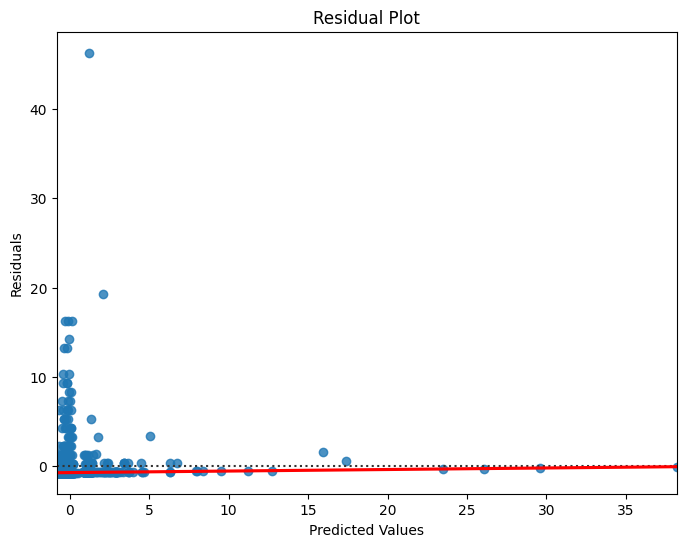

In [46]:
# Residual Plot
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={"color": "red"})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Step 11: Predicted vs Actual Plot

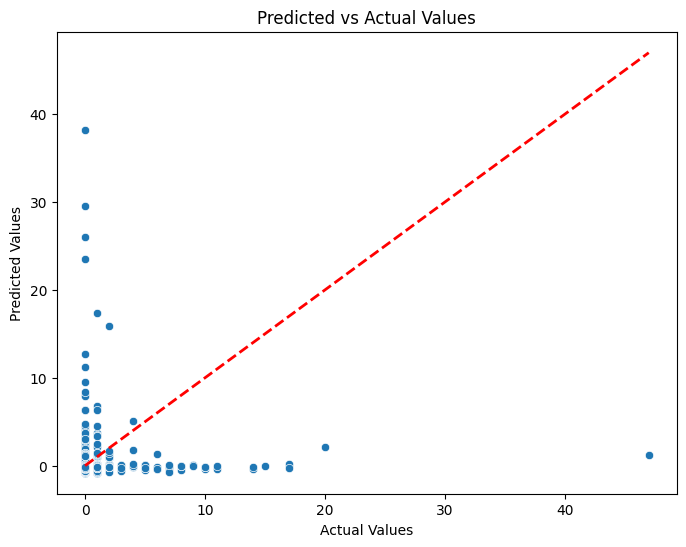

In [39]:
# Predicted vs Actual Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()